In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('dataset_veiculos-base.csv')

In [ ]:
df.head()

,modelo,ano,combustivel,cambio,valor
0,1.0 8V,2010/2011,Á/G,Manual,20743.0
1,G5 1.0 TREND,2012/2013,Á/G,Manual,24500.0
2,1.0 TREND,2009/2010,Á/G,Manual,21500.0
3,1.6 POWER,2005/2005,Á/G,Manual,16900.0
4,1.0 8V,2008/2009,Á/G,Manual,22900.0


In [ ]:
df.isnull().sum()

,0
modelo,0
ano,0
combustivel,0
cambio,0
valor,0


In [ ]:
df['ano_fabricacao'] = df['ano']
df['ano_modelo']

In [ ]:
# Obtendo novas colunas para ano de fabricação e ano do modelo
df['ano_f'] = df['ano'].map(lambda s:s.split('/')[0])
df['ano_m'] = df['ano'].map(lambda s:s.split('/')[1])

df['ano_f'] = df['ano_f'].astype(int)
df['ano_m'] = df['ano_m'].astype(int)

In [ ]:
df['ano_f'].describe()

,ano_f
count,18.000000
mean,2007.277778
std,11.585008
min,1985.000000
25%,2005.750000
50%,2010.000000
75%,2014.000000
max,2020.000000


In [ ]:
df['modelo'].unique()

array(['1.0 8V', 'G5 1.0 TREND', '1.0 TREND', '1.6 POWER', 'G4 1.0 8V',
       '1.0 12V MPI', '1.6 L', '1.0 TRENDLINE', '1.6 COMFORTLINE',
       '1.0 16V', '1.8 GTS', '1.6 GL', '1.6 BX', '1.0 CL'], dtype=object)

In [ ]:
# Transformando modelo em categoria
df['modelo'] = df['modelo'].astype('category')
df['modelo_cat'] = df['modelo'].cat.codes

In [ ]:
df.head()

,modelo,ano,combustivel,cambio,valor,ano_f,ano_m,modelo_cat
0,1.0 8V,2010/2011,Á/G,Manual,20743.0,2010,2011,2
1,G5 1.0 TREND,2012/2013,Á/G,Manual,24500.0,2012,2013,13
2,1.0 TREND,2009/2010,Á/G,Manual,21500.0,2009,2010,4
3,1.6 POWER,2005/2005,Á/G,Manual,16900.0,2005,2005,10
4,1.0 8V,2008/2009,Á/G,Manual,22900.0,2008,2009,2


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

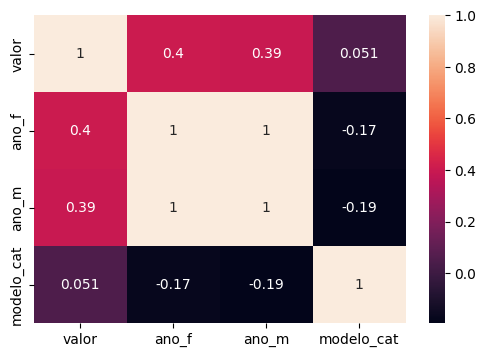

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['valor', 'ano_f', 'ano_m', 'modelo_cat']].corr(),
            annot=True)
plt.show()

In [ ]:
X = df['ano_f']
y = df['valor']

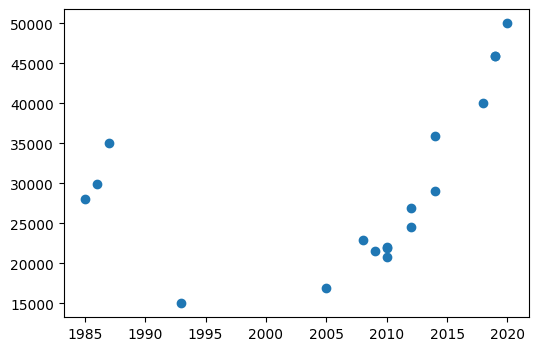

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X, y)
plt.show()

# Função de teste de validação cruzada

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

def validacao_cruzada(modelo, X, y, cv=5):
    # Inicializar o K-Fold com embaralhamento
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)

    # Configurando as métricas
    scoring = {
        'r2': make_scorer(r2_score),
        'mse': make_scorer(mean_squared_error)
    }

    # Executando validação cruzada
    scores = cross_validate(modelo, X, y, cv=kfold, scoring=scoring)

    # Extraindo as métricas
    r2 = scores['test_r2'].mean()
    mse = scores['test_mse'].mean()

    print(f'R²: {r2:.4f}')
    print(f'MSE: {mse:.4f}')


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
                                                    #random_state=42)

# Regressão Linear Simples

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
rl = LinearRegression()
rl.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [ ]:
# Avaliar o modelo
y_pred = rl.predict(X_test.values.reshape(-1,1))
r2_score(y_test, y_pred)

-2.5834763789130197

In [ ]:
validacao_cruzada(rl, X.values.reshape(-1,1), y, 5)

R²: -1.1865
MSE: 108484656.3653


In [ ]:
xPlot = np.linspace(min(X), max(X), 100)
yPlot = rl.predict(xPlot.reshape(-1,1))
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='green')
plt.plot(xPlot, yPlot, color='red')
plt.show()

# Regressão linear múltipla

In [ ]:
import re

In [ ]:
s = 'G4 1.0 8V'
re.search(r'\d\.\d', s).group()

'1.0'

In [ ]:
df['motor'] = df['modelo'].map(lambda s:re.search(r'\d\.\d', s).group())
df['motor'] = df['motor'].astype(float)

In [ ]:
X = df[['motor', 'ano_f']]
y = df['valor']

In [ ]:
rl = LinearRegression()
rl.fit(X, y)

LinearRegression()

In [ ]:
validacao_cruzada(rl, X, y, 5)

R²: -0.1801
MSE: 71704280.7429


# Regressão polinomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
X = df[['ano_f']]
y = df['valor']

In [ ]:
reg_2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
reg_2.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
validacao_cruzada(reg_2, X, y, 5)

R²: 0.8614
MSE: 8664131.8879
